In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
from glob import glob

%matplotlib inline

In [20]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [21]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv.gz", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [22]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew', 'tmdb_movies', 'imdb_title_akas', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_basics', 'tn_movie_budgets', 'bom_movie_gross', 'imdb_title_principals'])

In [23]:
movie_budgets_df = csv_files_dict['tn_movie_budgets']
movie_budgets_df.head(50)

release_date                                             movie  \
id                                                                   
1   Dec 18, 2009                                            Avatar   
2   May 20, 2011       Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                      Dark Phoenix   
4    May 1, 2015                           Avengers: Age of Ultron   
5   Dec 15, 2017                 Star Wars Ep. VIII: The Last Jedi   
6   Dec 18, 2015              Star Wars Ep. VII: The Force Awakens   
7   Apr 27, 2018                            Avengers: Infinity War   
8   May 24, 2007        Pirates of the Caribbean: At Worldâs End   
9   Nov 17, 2017                                    Justice League   
10   Nov 6, 2015                                           Spectre   
11  Jul 20, 2012                             The Dark Knight Rises   
12  May 25, 2018                           Solo: A Star Wars Story   
13   Jul 2, 2013                                   The Lone Ranger   
14   Mar 9, 2012                                       John Carter   
15  Nov 24, 2010                                           Tangled   
16   May 4, 2007                                      Spider-Man 3   
17   May 6, 2016                        Captain America: Civil War   
18  Mar 25, 2016                Batman v Superman: Dawn of Justice   
19  Dec 14, 2012                 The Hobbit: An Unexpected Journey   
20  Jul 15, 2009            Harry Potter and the Half-Blood Prince   
21  Dec 13, 2013               The Hobbit: The Desolation of Smaug   
22  Dec 17, 2014         The Hobbit: The Battle of the Five Armies   
23  Apr 14, 2017                           The Fate of the Furious   
24  Jun 28, 2006                                  Superman Returns   
25  May 26, 2017  Pirates of the Caribbean: Dead Men Tell No Tales   
26  Nov 14, 2008                                 Quantum of Solace   
27   May 4, 2012                                      The Avengers   
28   Jul 7, 2006      Pirates of the Caribbean: Dead Manâs Chest   
29  Jun 14, 2013                                      Man of Steel   
30  May 16, 2008          The Chronicles of Narnia: Prince Caspian   
31   Jul 3, 2012                            The Amazing Spider-Man   
32  May 18, 2012                                        Battleship   
33  Jun 21, 2017                     Transformers: The Last Knight   
34  Jun 12, 2015                                    Jurassic World   
35  May 25, 2012                                    Men in Black 3   
36  Jun 24, 2009               Transformers: Revenge of the Fallen   
37  Jun 27, 2014                   Transformers: Age of Extinction   
38  May 26, 2006                             X-Men: The Last Stand   
39  May 14, 2010                                        Robin Hood   
40  Dec 14, 2005                                         King Kong   
41   Dec 7, 2007                                The Golden Compass   
42  Feb 16, 2018                                     Black Panther   
43  Dec 19, 1997                                           Titanic   
44  Jun 15, 2018                                     Incredibles 2   
45  Dec 16, 2016                      Rogue One: A Star Wars Story   
46  Jun 17, 2016                                      Finding Dory   
47  Jun 18, 2010                                       Toy Story 3   
48   May 3, 2013                                        Iron Man 3   
49   May 5, 2017                     Guardians of the Galaxy Vol 2   
50  Jun 30, 2004                                      Spider-Man 2   

   production_budget domestic_gross worldwide_gross  
id                                                   
1       $425,000,000   $760,507,625  $2,776,345,279  
2       $410,600,000   $241,063,875  $1,045,663,875  
3       $350,000,000    $42,762,350    $149,762,350  
4       $330,600,000   $459,005,868  $1,403,013,963  
5       $317,000,000   $620,181,382  $1

### **I must adjust values for inflation**

In [24]:
movie_budgets_df.describe()

release_date movie production_budget domestic_gross worldwide_gross
count           5782  5782              5782           5782            5782
unique          2418  5698               509           5164            5356
top     Dec 31, 2014  Home       $20,000,000             $0              $0
freq              24     3               231            548             367

In [25]:
movie_budgets_df.shape

(5782, 5)

In [26]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [27]:
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

In [28]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    movie_budgets_df = convert_amt_to_int(movie_budgets_df, col)

In [29]:
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [30]:
for col in movie_budgets_df:
    print(col)
    print(movie_budgets_df[col].value_counts(normalize=True)[:])
    print('===================================')

release_date
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
                  ...   
Sep 4, 2007     0.000173
May 16, 2007    0.000173
Feb 20, 1998    0.000173
Jul 7, 1960     0.000173
Feb 15, 1950    0.000173
Name: release_date, Length: 2418, dtype: float64
movie
Home                           0.000519
King Kong                      0.000519
Halloween                      0.000519
Around the World in 80 Days    0.000346
The Love Letter                0.000346
                                 ...   
Glengarry Glen Ross            0.000173
Luminarias                     0.000173
Orange County                  0.000173
Die Hard: With a Vengeance     0.000173
Hoot                           0.000173
Name: movie, Length: 5698, dtype: float64
production_budget
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
              ...   
16400000    0.000173
103000    

In [33]:
movie_budgets_df['budget_gross_diff'] = (movie_budgets_df['worldwide_gross'] + movie_budgets_df['domestic_gross']) - \
                                        movie_budgets_df['production_budget']
movie_budgets_df.head()


release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   
4    May 1, 2015                      Avengers: Age of Ultron   
5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

    production_budget  domestic_gross  worldwide_gross  budget_gross_diff  
id                                                                         
1           425000000       760507625       2776345279         3111852904  
2           410600000       241063875       1045663875          876127750  
3           350000000        42762350        149762350         -157475300  
4           330600000       459005868       1403013963         1531419831  
5           317000000       620181382       1316721747         1619903129

In [34]:
movie_budgets_df.shape

(5782, 6)

In [36]:
movie_budgets_df = movie_budgets_df.sort_values(by = 'budget_gross_diff', ascending=False)

In [37]:
movie_budgets_df.head(10)

release_date                                 movie  production_budget  \
id                                                                          
1   Dec 18, 2009                                Avatar          425000000   
6   Dec 18, 2015  Star Wars Ep. VII: The Force Awakens          306000000   
43  Dec 19, 1997                               Titanic          200000000   
7   Apr 27, 2018                Avengers: Infinity War          300000000   
34  Jun 12, 2015                        Jurassic World          215000000   
27   May 4, 2012                          The Avengers          225000000   
42  Feb 16, 2018                         Black Panther          200000000   
67   Apr 3, 2015                             Furious 7          190000000   
44  Jun 15, 2018                         Incredibles 2          200000000   
5   Dec 15, 2017     Star Wars Ep. VIII: The Last Jedi          317000000   

    domestic_gross  worldwide_gross  budget_gross_diff  
id                                                      
1        760507625       2776345279         3111852904  
6        936662225       2053311220         2683973445  
43       659363944       2208208395         2667572339  
7        678815482       2048134200         2426949682  
34       652270625       1648854864         2086125489  
27       623279547       1517935897         1916215444  
42       700059566       1348258224         1848317790  
67       353007020       1518722794         1681729814  
44       608581744       1242520711         1651102455  
5        620181382       1316721747         1619903129

In [ ]:
#movie_budgets_df_top50 = movie_budgets_df[:50]

<AxesSubplot:xlabel='budget_gross_diff', ylabel='movie'>

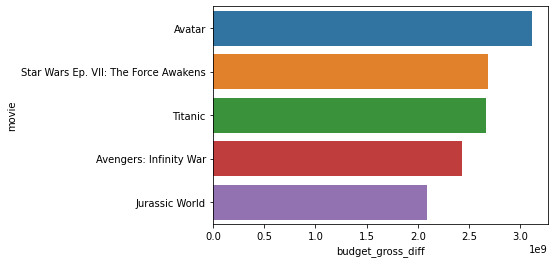

In [39]:
sns.barplot(x ='budget_gross_diff', y ='movie', data = movie_budgets_df[:5])

## Exploring ROI

In [40]:
movie_budgets_df['ROI'] = movie_budgets_df['budget_gross_diff'] / movie_budgets_df['production_budget']
movie_budgets_df.head()

release_date                                 movie  production_budget  \
id                                                                          
1   Dec 18, 2009                                Avatar          425000000   
6   Dec 18, 2015  Star Wars Ep. VII: The Force Awakens          306000000   
43  Dec 19, 1997                               Titanic          200000000   
7   Apr 27, 2018                Avengers: Infinity War          300000000   
34  Jun 12, 2015                        Jurassic World          215000000   

    domestic_gross  worldwide_gross  budget_gross_diff        ROI  
id                                                                 
1        760507625       2776345279         3111852904   7.322007  
6        936662225       2053311220         2683973445   8.771155  
43       659363944       2208208395         2667572339  13.337862  
7        678815482       2048134200         2426949682   8.089832  
34       652270625       1648854864         2086125489   9.702909

In [41]:
movie_budgets_df = movie_budgets_df.sort_values(by = 'ROI',ascending=False)

In [42]:
movie_budgets_df.head()

release_date                    movie  production_budget  domestic_gross  \
id                                                                             
46  Jun 30, 1972              Deep Throat              25000        45000000   
93  Sep 25, 2009      Paranormal Activity             450000       107918810   
7   Jul 14, 1999  The Blair Witch Project             600000       140539099   
80  Jul 10, 2015              The Gallows             100000        22764410   
74  Feb 26, 1993              El Mariachi               7000         2040920   

    worldwide_gross  budget_gross_diff          ROI  
id                                                   
46         45000000           89975000  3599.000000  
93        194183034          301651844   670.337431  
7         248300000          388239099   647.065165  
80         41656474           64320884   643.208840  
74          2041928            4075848   582.264000

In [46]:
! pip install cpi

In [48]:
import cpi

In [49]:
cpi.update()

In [50]:
cpi.inflate(100,1950)

1073.9045643153527

In [51]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df.head()

release_date                    movie  production_budget  domestic_gross  \
id                                                                            
46   1972-06-30              Deep Throat              25000        45000000   
93   2009-09-25      Paranormal Activity             450000       107918810   
7    1999-07-14  The Blair Witch Project             600000       140539099   
80   2015-07-10              The Gallows             100000        22764410   
74   1993-02-26              El Mariachi               7000         2040920   

    worldwide_gross  budget_gross_diff          ROI  
id                                                   
46         45000000           89975000  3599.000000  
93        194183034          301651844   670.337431  
7         248300000          388239099   647.065165  
80         41656474           64320884   643.208840  
74          2041928            4075848   582.264000

In [52]:
movie_budgets_df['year'] = movie_budgets_df['release_date'].dt.year

In [53]:
movie_budgets_df['year'].isna().sum()

0

In [54]:
movie_budgets_df['production_budget'].isna().sum()

0

In [55]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 46 to 63
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
 5   budget_gross_diff  5782 non-null   int64         
 6   ROI                5782 non-null   float64       
 7   year               5782 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 406.5+ KB


In [ ]:
cpi.update()

In [ ]:
movie_budgets_df['adjusted'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.production_budget, x.release_date),\
                                                      axis=1)
movie_budgets_df.head()

In [56]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [57]:
from pandas_profiling import ProfileReport

In [58]:
profile = ProfileReport(movie_budgets_df, title ='PPR', html={'style':{'full_width':True}})

In [59]:
profile

In [60]:
movie_budgets_df.head()

release_date                    movie  production_budget  domestic_gross  \
id                                                                            
46   1972-06-30              Deep Throat              25000        45000000   
93   2009-09-25      Paranormal Activity             450000       107918810   
7    1999-07-14  The Blair Witch Project             600000       140539099   
80   2015-07-10              The Gallows             100000        22764410   
74   1993-02-26              El Mariachi               7000         2040920   

    worldwide_gross  budget_gross_diff          ROI  year  
id                                                         
46         45000000           89975000  3599.000000  1972  
93        194183034          301651844   670.337431  2009  
7         248300000          388239099   647.065165  1999  
80         41656474           64320884   643.208840  2015  
74          2041928            4075848   582.264000  1993

In [62]:
movie_budgets_df.shape

(5782, 8)

In [63]:
movie_budgets_df = movie_budgets_df[movie_budgets_df.domestic_gross != 0]

In [65]:
movie_budgets_df = movie_budgets_df.sort_values(by = 'domestic_gross', ascending=True)
movie_budgets_df.head()

release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  
id                                                                      
32             388           247565           -9752047 -0.975205  2014  
71             401              401              -9198 -0.919800  2008  
19             423              423            -399154 -0.997885  2005  
70             527              527              -8946 -0.894600  1996  
67             528              528            -498944 -0.997888  2018

In [64]:
movie_budgets_df.shape

(5234, 8)

In [66]:
movie_budgets_df['adjusted_domestic_gross'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.domestic_gross, x.release_date),\
                                                      axis=1)
movie_budgets_df.head()

release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752047 -0.975205  2014   
71             401              401              -9198 -0.919800  2008   
19             423              423            -399154 -0.997885  2005   
70             527              527              -8946 -0.894600  1996   
67             528              528            -498944 -0.997888  2018   

    adjusted_domestic_gross  
id                           
32               437.678977  
71               484.812708  
19               562.464714  
70               893.091356  
67               555.889216

In [67]:
movie_budgets_df['adjusted_worldwide_gross'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.worldwide_gross, x.release_date),\
                                                      axis=1)
movie_budgets_df.head()

release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752047 -0.975205  2014   
71             401              401              -9198 -0.919800  2008   
19             423              423            -399154 -0.997885  2005   
70             527              527              -8946 -0.894600  1996   
67             528              528            -498944 -0.997888  2018   

    adjusted_domestic_gross  adjusted_worldwide_gross  
id                                                     
32               437.678977             279262.876280  
71               484.812708                484.812708  
19               562.464714                562.464714  
70               893.091356                893.091356  
67               555.889216                555.889216

In [69]:
movie_budgets_df['adjusted_production_budget'] = movie_budgets_df.apply(lambda x: cpi.inflate(x.production_budget, x.release_date),\
                                                      axis=1)
movie_budgets_df.head()

release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752047 -0.975205  2014   
71             401              401              -9198 -0.919800  2008   
19             423              423            -399154 -0.997885  2005   
70             527              527              -8946 -0.894600  1996   
67             528              528            -498944 -0.997888  2018   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
id                                                      
32               437.678977             279262.876280   
71               484.812708                484.812708   
19               562.464714                562.464714   
70               893.091356                893.091356   
67               555.889216                555.889216   

    adjusted_production_budget  
id                              
32                1.128039e+07  
71                1.209009e+04  
19                5.318815e+05  
70                1.694671e+04  
67                5.264102e+05

In [70]:
movie_budgets_df['adjusted_budget_gross_diff'] = (movie_budgets_df['adjusted_worldwide_gross'] + movie_budgets_df['adjusted_domestic_gross']) - \
                                        movie_budgets_df['adjusted_production_budget']
movie_budgets_df.head()

release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752047 -0.975205  2014   
71             401              401              -9198 -0.919800  2008   
19             423              423            -399154 -0.997885  2005   
70             527              527              -8946 -0.894600  1996   
67             528              528            -498944 -0.997888  2018   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
id                                                      
32               437.678977             279262.876280   
71               484.812708                484.812708   
19               562.464714                562.464714   
70               893.091356                893.091356   
67               555.889216                555.889216   

    adjusted_production_budget  adjusted_budget_gross_diff  
id                                                          
32                1.128039e+07               -1.100069e+07  
71                1.209009e+04               -1.112047e+04  
19                5.318815e+05               -5.307566e+05  
70                1.694671e+04               -1.516052e+04  
67                5.264102e+05               -5.252985e+05

In [71]:
movie_budgets_df['adjusted_roi'] = movie_budgets_df['adjusted_budget_gross_diff'] / movie_budgets_df['adjusted_production_budget']
movie_budgets_df.head()

release_date                            movie  production_budget  \
id                                                                    
32   2014-12-26                         Barbecue           10000000   
71   2008-08-14  The Rise and Fall of Miss Thang              10000   
19   2005-10-13                   The Dark Hours             400000   
70   1996-04-01                             Bang              10000   
67   2018-05-11                     Higher Power             500000   

    domestic_gross  worldwide_gross  budget_gross_diff       ROI  year  \
id                                                                       
32             388           247565           -9752047 -0.975205  2014   
71             401              401              -9198 -0.919800  2008   
19             423              423            -399154 -0.997885  2005   
70             527              527              -8946 -0.894600  1996   
67             528              528            -498944 -0.997888  2018   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
id                                                      
32               437.678977             279262.876280   
71               484.812708                484.812708   
19               562.464714                562.464714   
70               893.091356                893.091356   
67               555.889216                555.889216   

    adjusted_production_budget  adjusted_budget_gross_diff  adjusted_roi  
id                                                                        
32                1.128039e+07               -1.100069e+07     -0.975205  
71                1.209009e+04               -1.112047e+04     -0.919800  
19                5.318815e+05               -5.307566e+05     -0.997885  
70                1.694671e+04               -1.516052e+04     -0.894600  
67                5.264102e+05               -5.252985e+05     -0.997888

In [72]:
movie_budgets_df.drop(columns=['production_budget','domestic_gross','worldwide_gross','budget_gross_diff','ROI'], inplace=True)

In [73]:
movie_budgets_df.head()

release_date                            movie  year  \
id                                                       
32   2014-12-26                         Barbecue  2014   
71   2008-08-14  The Rise and Fall of Miss Thang  2008   
19   2005-10-13                   The Dark Hours  2005   
70   1996-04-01                             Bang  1996   
67   2018-05-11                     Higher Power  2018   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
id                                                      
32               437.678977             279262.876280   
71               484.812708                484.812708   
19               562.464714                562.464714   
70               893.091356                893.091356   
67               555.889216                555.889216   

    adjusted_production_budget  adjusted_budget_gross_diff  adjusted_roi  
id                                                                        
32                1.128039e+07               -1.100069e+07     -0.975205  
71                1.209009e+04               -1.112047e+04     -0.919800  
19                5.318815e+05               -5.307566e+05     -0.997885  
70                1.694671e+04               -1.516052e+04     -0.894600  
67                5.264102e+05               -5.252985e+05     -0.997888

In [74]:
movie_budgets_df = movie_budgets_df.sort_values(by = 'adjusted_roi', ascending=False)

In [75]:
movie_budgets_df.reset_index()

id release_date                           movie  year  \
0     46   1972-06-30                     Deep Throat  1972   
1     93   2009-09-25             Paranormal Activity  2009   
2      7   1999-07-14         The Blair Witch Project  1999   
3     80   2015-07-10                     The Gallows  2015   
4     74   1993-02-26                     El Mariachi  1993   
...   ..          ...                             ...   ...   
5229  28   1993-01-01          Ed and his Dead Mother  1993   
5230  43   2013-11-01                      Mr. Nobody  2013   
5231  53   1997-08-24  The Grimm Brothers' Snow White  1997   
5232  19   2015-05-08                      Skin Trade  2015   
5233  82   2010-05-21              Perrierâs Bounty  2010   

      adjusted_domestic_gross  adjusted_worldwide_gross  \
0                2.858385e+08              2.858385e+08   
1                1.323579e+08              2.381574e+08   
2                2.233088e+08              3.945348e+08   
3                2.526573e+07              4.623363e+07   
4                3.777727e+06              3.779593e+06   
...                       ...                       ...   
5229             1.250086e+03              1.250086e+03   
5230             4.116311e+03              2.529111e+04   
5231             8.236225e+03              8.236225e+03   
5232             1.383391e+03              1.383391e+03   
5233             1.005226e+03              1.005226e+03   

      adjusted_production_budget  adjusted_budget_gross_diff  adjusted_roi  
0                   1.587992e+05                5.715182e+08   3599.000000  
1                   5.519063e+05                3.699634e+08    670.337431  
2                   9.533665e+05                6.168903e+08    647.065165  
3                   1.109879e+05                7.138838e+07    643.208840  
4                   1.295695e+04                7.544363e+06    582.264000  
...                          ...                         ...           ...  
5229                3.343468e+06               -3.340968e+06     -0.999252  
5230                5.284607e+07               -5.281666e+07     -0.999444  
5231                4.282837e+07               -4.281190e+07     -0.999615  
5232                1.002457e+07               -1.002180e+07     -0.999724  
5233                8.012669e+06               -8.010659e+06     -0.999749  

[5234 rows x 9 columns]

In [76]:
movie_budgets_df.shape

(5234, 8)

<AxesSubplot:xlabel='adjusted_roi', ylabel='movie'>

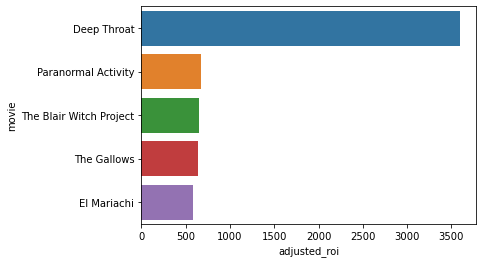

In [78]:
sns.barplot(x ='adjusted_roi', y ='movie', data = movie_budgets_df[:5])

## in breaking news - sex sells

however we should really get rid of that outlier - onlyfans changed the adult entertainment game

In [79]:
movie_budgets_df = movie_budgets_df[movie_budgets_df.movie != "Deep Throat"]

In [80]:
movie_budgets_df.head(1)

release_date                movie  year  adjusted_domestic_gross  \
id                                                                    
93   2009-09-25  Paranormal Activity  2009             1.323579e+08   

    adjusted_worldwide_gross  adjusted_production_budget  \
id                                                         
93              2.381574e+08               551906.292107   

    adjusted_budget_gross_diff  adjusted_roi  
id                                            
93                3.699634e+08    670.337431

<AxesSubplot:xlabel='adjusted_roi', ylabel='movie'>

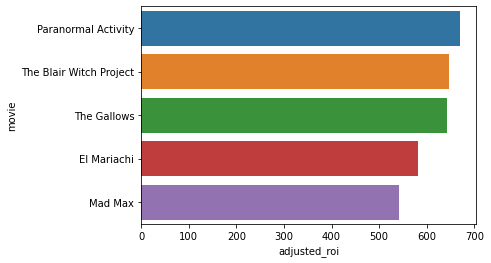

In [82]:
sns.barplot(x ='adjusted_roi', y ='movie', data = movie_budgets_df[:5])

# Let's bring in the genres!

In [83]:
title_basics_df = csv_files_dict['imdb_title_basics']
title_basics_df.head()

primary_title              original_title  \
tconst                                                                   
tt0063540                        Sunghursh                   Sunghursh   
tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
tt0069049       The Other Side of the Wind  The Other Side of the Wind   
tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
tt0100275         The Wandering Soap Opera       La Telenovela Errante   

           start_year  runtime_minutes                genres  
tconst                                                        
tt0063540        2013            175.0    Action,Crime,Drama  
tt0066787        2019            114.0       Biography,Drama  
tt0069049        2018            122.0                 Drama  
tt0069204        2018              NaN          Comedy,Drama  
tt0100275        2017             80.0  Comedy,Drama,Fantasy

In [84]:
title_basics_df.shape

(146144, 5)

In [85]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [86]:
title_basics_df.describe()

start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000

In [87]:
title_basics_df.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [88]:
profile2 = ProfileReport(title_basics_df, title ='PPR2', html={'style':{'full_width':True}})

In [89]:
profile2

## Lets inspect the duplicates

In [90]:
title_basics_df.duplicated().sum()

122

In [91]:
title_basics_df.primary_title.duplicated().sum()

10073

In [92]:
title_basics_df.primary_title.duplicated()

tconst
tt0063540    False
tt0066787    False
tt0069049    False
tt0069204    False
tt0100275    False
             ...  
tt9916538    False
tt9916622    False
tt9916706    False
tt9916730    False
tt9916754    False
Name: primary_title, Length: 146144, dtype: bool

In [93]:
title_basics_df[title_basics_df.primary_title.duplicated()]

primary_title               original_title  \
tconst                                                                 
tt10022974                      Nemesis                      Nemesis   
tt10064536  Untitled Disney Marvel Film  Untitled Disney Marvel Film   
tt10064558         Untitled Marvel Film         Untitled Marvel Film   
tt10127292  Plushtubers: The Apocalypse  Plushtubers: The Apocalypse   
tt10148772                    Indemnity                    Indemnity   
...                                 ...                          ...   
tt9913594                   Bacchanalia                  Bacchanalia   
tt9913936                      Paradise                     Paradise   
tt9914642                     Albatross                    Albatross   
tt9916160                    Drømmeland                   Drømmeland   
tt9916170                 The Rehearsal                     O Ensaio   

            start_year  runtime_minutes                  genres  
tconst                                                           
tt10022974        2019              NaN         Action,Thriller  
tt10064536        2022              NaN                  Action  
tt10064558        2021              NaN                  Action  
tt10127292        2019              NaN        Action,Adventure  
tt10148772        2018             45.0                Thriller  
...                ...              ...                     ...  
tt9913594         2017             72.0  Drama,Mystery,Thriller  
tt9913936         2019              NaN             Crime,Drama  
tt9914642         2017              NaN             Documentary  
tt9916160         2019             72.0             Documentary  
tt9916170         2019             51.0                   Drama  

[10073 rows x 5 columns]

In [94]:
title_basics_df[title_basics_df.primary_title.duplicated()].head(50)

primary_title  \
tconst                                                      
tt10022974                                        Nemesis   
tt10064536                    Untitled Disney Marvel Film   
tt10064558                           Untitled Marvel Film   
tt10127292                    Plushtubers: The Apocalypse   
tt10148772                                      Indemnity   
tt10155932                                     Cinderella   
tt10183816                                       Windfall   
tt10217566                                           Prey   
tt10224422                                         Olanda   
tt10230042                             Rok Sako To Rok Lo   
tt10230622                                       Aitebaar   
tt10230624                 Huway Hum Jin Kay Liye Barbaad   
tt10261338                                       Paradise   
tt10268532  Sapo: Live at the Avalon... Ritmo del Corazon   
tt10275936                Raggarjävlar (Swedish Greasers)   
tt10291640                                           Adam   
tt10294034                                Cinema of Sleep   
tt10294358                                         Devour   
tt10298668                           Untitled Marvel Film   
tt10300396                        Untitled Star Wars Film   
tt10300398                        Untitled Star Wars Film   
tt10303892                                   The Outsider   
tt10304138            Unitlted Disney Live Action Project   
tt10304140            Unitlted Disney Live Action Project   
tt10304142            Unitlted Disney Live Action Project   
tt10310660                             Raffaele Sollecito   
tt10314516                                   A Resistance   
tt10317856                            Me and Mr. Canadian   
tt10319300                            Me and Mr. Canadian   
tt10324140                             Between Two Worlds   
tt10325662                                          Magic   
tt10332854                                          Alone   
tt10344122                                    The Courier   
tt10349448                             Camino del Triunfo   
tt10349504                                 Bloody Benders   
tt10356428                    Agent Sai Srinivasa Athreya   
tt10359746                                Diamond Anxiety   
tt10371174                                    Rising Star   
tt10380766                                       Immortal   
tt10411090                                     Drain Baby   
tt10417444                                       Antigone   
tt10435840                                         Sunday   
tt10437138           Grateful Dead: Meet-Up at the Movies   
tt10438450                            Innocence Of A King   
tt10443320              Pororo, Dinosaur Island Adventure   
tt10443708                                 Monster Mayhem   
tt10443784                                  Growing Pains   
tt10449346                              Corey Adam: Jokes   
tt10449440                                   The Only Mom   
tt10449452                                        Trouble   

                                           original_title  start_year  \
tconst                                                                  
tt10022974                                        Nemesis        2019   
tt10064536                    Untitled Disney Marvel Film        2022   
tt10064558                           Untitled Marvel Film        2021   
tt10127292                    Plushtubers: The Apocalypse        2019   
tt10148772                                      Indemnity        2018   
tt10155932                                     Cinderella        2021   
tt10183816                                       Windfall        2020   
tt10217566                                           Prey        2019   
tt10224422                                         Olanda        2019   
tt10230042                             Rok Sako To Rok Lo        201

### Thats not how to do it

In [95]:
title_basics_df.head()

primary_title              original_title  \
tconst                                                                   
tt0063540                        Sunghursh                   Sunghursh   
tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
tt0069049       The Other Side of the Wind  The Other Side of the Wind   
tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
tt0100275         The Wandering Soap Opera       La Telenovela Errante   

           start_year  runtime_minutes                genres  
tconst                                                        
tt0063540        2013            175.0    Action,Crime,Drama  
tt0066787        2019            114.0       Biography,Drama  
tt0069049        2018            122.0                 Drama  
tt0069204        2018              NaN          Comedy,Drama  
tt0100275        2017             80.0  Comedy,Drama,Fantasy

In [96]:
title_basics_df[title_basics_df.duplicated()]

primary_title  \
tconst                                                          
tt10064536                        Untitled Disney Marvel Film   
tt10064558                               Untitled Marvel Film   
tt10127292                        Plushtubers: The Apocalypse   
tt10224422                                             Olanda   
tt10230042                                 Rok Sako To Rok Lo   
...                                                       ...   
tt9616952                                  View from the Past   
tt9660588                                             3. Elma   
tt9688944   Um fio de esperança: independência ou guerra n...   
tt9773302                                             3. Elma   
tt9889072                                         The Promise   

                                               original_title  start_year  \
tconst                                                                      
tt10064536                        Untitled Disney Marvel Film        2022   
tt10064558                               Untitled Marvel Film        2021   
tt10127292                        Plushtubers: The Apocalypse        2019   
tt10224422                                             Olanda        2019   
tt10230042                                 Rok Sako To Rok Lo        2018   
...                                                       ...         ...   
tt9616952                                  View from the Past        2019   
tt9660588                                             3. Elma        2014   
tt9688944   Um fio de esperança: independência ou guerra n...        2017   
tt9773302                                             3. Elma        2014   
tt9889072                                         The Promise        2017   

            runtime_minutes            genres  
tconst                                         
tt10064536              NaN            Action  
tt10064558              NaN            Action  
tt10127292              NaN  Action,Adventure  
tt10224422            154.0       Documentary  
tt10230042              NaN            Comedy  
...                     ...               ...  
tt9616952               NaN            Sci-Fi  
tt9660588              65.0             Drama  
tt9688944              94.0       Documentary  
tt9773302              65.0             Drama  
tt9889072               NaN             Drama  

[122 rows x 5 columns]

In [97]:
title_basics_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [98]:
title_basics_df.head()

primary_title              original_title  \
tconst                                                                   
tt0063540                        Sunghursh                   Sunghursh   
tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
tt0069049       The Other Side of the Wind  The Other Side of the Wind   
tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
tt0100275         The Wandering Soap Opera       La Telenovela Errante   

           start_year  runtime_minutes                genres  
tconst                                                        
tt0063540        2013            175.0    Action,Crime,Drama  
tt0066787        2019            114.0       Biography,Drama  
tt0069049        2018            122.0                 Drama  
tt0069204        2018              NaN          Comedy,Drama  
tt0100275        2017             80.0  Comedy,Drama,Fantasy

In [99]:
title_basics_df = title_basics_df.reset_index()

In [100]:
title_basics_df.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [101]:
title_basics_df.drop(columns = ['tconst'], axis =1, inplace=True)
title_basics_df.head()

primary_title              original_title  start_year  \
0                        Sunghursh                   Sunghursh        2013   
1  One Day Before the Rainy Season             Ashad Ka Ek Din        2019   
2       The Other Side of the Wind  The Other Side of the Wind        2018   
3                  Sabse Bada Sukh             Sabse Bada Sukh        2018   
4         The Wandering Soap Opera       La Telenovela Errante        2017   

   runtime_minutes                genres  
0            175.0    Action,Crime,Drama  
1            114.0       Biography,Drama  
2            122.0                 Drama  
3              NaN          Comedy,Drama  
4             80.0  Comedy,Drama,Fantasy

In [ ]:
title_basics_df.shape

# Lets join budget & genre dfs 

In [102]:
movie_budgets_df.head()

release_date                    movie  year  adjusted_domestic_gross  \
id                                                                        
93   2009-09-25      Paranormal Activity  2009             1.323579e+08   
7    1999-07-14  The Blair Witch Project  1999             2.233088e+08   
80   2015-07-10              The Gallows  2015             2.526573e+07   
74   1993-02-26              El Mariachi  1993             3.777727e+06   
14   1980-03-21                  Mad Max  1980             2.893475e+07   

    adjusted_worldwide_gross  adjusted_production_budget  \
id                                                         
93              2.381574e+08               551906.292107   
7               3.945348e+08               953366.526695   
80              4.623363e+07               110987.873658   
74              3.779593e+06                12956.946191   
14              3.298562e+08               661365.792759   

    adjusted_budget_gross_diff  adjusted_roi  
id                                            
93                3.699634e+08    670.337431  
7                 6.168903e+08    647.065165  
80                7.138838e+07    643.208840  
74                7.544363e+06    582.264000  
14                3.581296e+08    541.500000

In [103]:
movie_budgets_df = movie_budgets_df.reset_index()

In [104]:
movie_budgets_df.drop(columns = ['id'], axis=1, inplace=True)
movie_budgets_df.head()

release_date                    movie  year  adjusted_domestic_gross  \
0   2009-09-25      Paranormal Activity  2009             1.323579e+08   
1   1999-07-14  The Blair Witch Project  1999             2.233088e+08   
2   2015-07-10              The Gallows  2015             2.526573e+07   
3   1993-02-26              El Mariachi  1993             3.777727e+06   
4   1980-03-21                  Mad Max  1980             2.893475e+07   

   adjusted_worldwide_gross  adjusted_production_budget  \
0              2.381574e+08               551906.292107   
1              3.945348e+08               953366.526695   
2              4.623363e+07               110987.873658   
3              3.779593e+06                12956.946191   
4              3.298562e+08               661365.792759   

   adjusted_budget_gross_diff  adjusted_roi  
0                3.699634e+08    670.337431  
1                6.168903e+08    647.065165  
2                7.138838e+07    643.208840  
3                7.544363e+06    582.264000  
4                3.581296e+08    541.500000

In [105]:
movie_details_df = pd.merge(movie_budgets_df, title_basics_df, left_on=  ['movie'],
                   right_on= ['primary_title'], 
                   how = 'left')


In [106]:
movie_details_df.shape

(6448, 13)

In [107]:
movie_details_df.head(50)

release_date                               movie  year  \
0    2009-09-25                 Paranormal Activity  2009   
1    1999-07-14             The Blair Witch Project  1999   
2    2015-07-10                         The Gallows  2015   
3    1993-02-26                         El Mariachi  1993   
4    1980-03-21                             Mad Max  1980   
5    2004-05-07                       Super Size Me  2004   
6    1942-08-13                               Bambi  1942   
7    1995-08-09               The Brothers McMullen  1995   
8    1974-10-18         The Texas Chainsaw Massacre  1974   
9    1968-10-01            Night of the Living Dead  1968   
10   1978-10-17                           Halloween  1978   
11   1976-11-21                               Rocky  1976   
12   1976-11-21                               Rocky  1976   
13   2005-08-05                   My Date With Drew  2005   
14   1973-08-11                   American Graffiti  1973   
15   1994-10-19                              Clerks  1994   
16   1937-12-21     Snow White and the Seven Dwarfs  1937   
17   1937-12-21     Snow White and the Seven Dwarfs  1937   
18   1971-01-01                          Billy Jack  1971   
19   1997-08-01               In the Company of Men  1997   
20   2004-06-11                   Napoleon Dynamite  2004   
21   2007-05-16                                Once  2007   
22   2006-09-29                   Facing the Giants  2006   
23   1971-01-01  Sweet Sweetback's Baad Asssss Song  1971   
24   1969-07-25                    The Stewardesses  1969   
25   1981-05-01                      Graduation Day  1981   
26   1915-02-08               The Birth of a Nation  1915   
27   2004-10-08                              Primer  2004   
28   1980-05-09                     Friday the 13th  1980   
29   2004-08-06                          Open Water  2004   
30   2012-01-06                    The Devil Inside  2012   
31   1939-12-15                  Gone with the Wind  1939   
32   1977-01-01                          Eraserhead  1977   
33   2001-03-09                             Dayereh  2001   
34   1925-11-19                      The Big Parade  1925   
35   2008-09-26                           Fireproof  2008   
36   2004-10-29                                 Saw  2004   
37   1974-11-15                               Benji  1974   
38   1974-11-15                               Benji  1974   
39   2002-04-19            My Big Fat Greek Wedding  2002   
40   1950-02-15                          Cinderella  1950   
41   1950-02-15                          Cinderella  1950   
42   1950-02-15                          Cinderella  1950   
43   1950-02-15                          Cinderella  1950   
44   1950-02-15                          Cinderella  1950   
45   1950-02-15                          Cinderella  1950   
46   1950-02-15                          Cinderella  1950   
47   1982-06-11           ET: The Extra-Terrestrial  1982   
48   1998-07-10                                  Pi  1998   
49   1970-03-26                           Woodstock  1970   

    adjusted_domestic_gross  adjusted_worldwide_gross  \
0              1.323579e+08              2.381574e+08   
1              2.233088e+08              3.945348e+08   
2              2.526573e+07              4.623363e+07   
3              3.777727e+06              3.779593e+06   
4              2.893475e+07              3.298562e+08   
5              1.614947e+07              3.114344e+07   
6              1.650216e+09              4.302245e+09   
7              1.806240e+07              1.806240e+07   
8              1.377383e+08              1.377383e+08   
9              9.069647e+07              2.257612e+08   
10             1.855323e+08              2.763247e+08   
11             5.353947e+08              1.027540e+09   
12             5.353947e+08              1.027540e+09   
13             2.441629e+05              2.441629e+05   
14             6.754070e+08         

In [108]:
movie_details_df.dropna(subset= ['genres'], inplace=True)

In [109]:
movie_details_df.movie.duplicated().sum()

1219

In [110]:
movie_details_df.shape

(3211, 13)

In [111]:
movie_details_df.drop_duplicates(subset='movie', keep='first', inplace=True)

In [114]:
movie_details_df.head(25)

release_date                            movie  year  \
2     2015-07-10                      The Gallows  2015   
6     1942-08-13                            Bambi  1942   
9     1968-10-01         Night of the Living Dead  1968   
10    1978-10-17                        Halloween  1978   
11    1976-11-21                            Rocky  1976   
16    1937-12-21  Snow White and the Seven Dwarfs  1937   
25    1981-05-01                   Graduation Day  1981   
26    1915-02-08            The Birth of a Nation  1915   
30    2012-01-06                 The Devil Inside  2012   
37    1974-11-15                            Benji  1974   
40    1950-02-15                       Cinderella  1950   
55    2011-04-01                        Insidious  2011   
56    2015-04-17                       Unfriended  2015   
62    2009-04-23                             Home  2009   
89    2010-10-20            Paranormal Activity 2  2010   
90    2017-02-24                          Get Out  2017   
92    2017-01-20                            Split  2017   
103   1940-02-09                        Pinocchio  1940   
108   1940-11-13                         Fantasia  1940   
114   2011-10-21            Paranormal Activity 3  2011   
115   2016-10-21                        Moonlight  2016   
118   2010-08-27                The Last Exorcism  2010   
121   2012-05-25                Chernobyl Diaries  2012   
128   1980-01-01                           Maniac  1980   
132   1996-10-18                         Swingers  1996   

     adjusted_domestic_gross  adjusted_worldwide_gross  \
2               2.526573e+07              4.623363e+07   
6               1.650216e+09              4.302245e+09   
9               9.069647e+07              2.257612e+08   
10              1.855323e+08              2.763247e+08   
11              5.353947e+08              1.027540e+09   
16              3.401563e+09              3.401563e+09   
25              7.047852e+07              7.047852e+07   
26              2.648770e+08              2.913647e+08   
30              6.224220e+07              1.189145e+08   
37              1.623185e+08              1.623185e+08   
40              9.580657e+08              2.971034e+09   
55              6.360783e+07              1.176203e+08   
56              3.670862e+07              7.205692e+07   
62              1.917017e+04              5.564003e+07   
89              1.026427e+08              2.149817e+08   
90              1.914144e+08              2.776694e+08   
92              1.506781e+08              3.042813e+08   
103             1.594938e+09              1.594938e+09   
108             1.576397e+09              1.576397e+09   
114             1.216974e+08              2.422041e+08   
115             3.052232e+07              7.149343e+07   
118             4.978680e+07              8.513198e+07   
121             2.088408e+07              4.888232e+07   
128             3.404589e+07              3.404589e+07   
132             7.539577e+06              1.107460e+07   

     adjusted_production_budget  adjusted_budget_gross_diff  adjusted_roi  \
2                  1.109879e+05                7.138838e+07    643.208840   
6                  1.377360e+07                5.938687e+09    431.164336   
9                  8.554101e+05                3.156023e+08    368.948491   
10                 1.282936e+06                4.605741e+08    359.000000   
11                 4.566845e+06                1.558368e+09    341.235147   
16                 2.737062e+07                6.775755e+09    247.555761   
25                 7.374081e+05                1.402196e+08    190.152000   
26                 2.913647e+06                5.533281e+08    189.909091   
30                 1.168584e+06                1.799881e+08    154.022435   
37                 2.571621e+06                3.220653e+08    125.238240   
40                 3.268695e+07                3.896413e+09    119.203936   
55                 1.766585e+06     

In [113]:
movie_details_df.shape

(1992, 13)

### Now we will analyze the frequency of the genres 

In [115]:
type(movie_details_df.genres)

pandas.core.series.Series

In [116]:
movie_details_df.genres = movie_details_df.genres.apply(lambda x: x.split(',') if x else x)

In [117]:
movie_details_df.head()

release_date                     movie  year  adjusted_domestic_gross  \
2    2015-07-10               The Gallows  2015             2.526573e+07   
6    1942-08-13                     Bambi  1942             1.650216e+09   
9    1968-10-01  Night of the Living Dead  1968             9.069647e+07   
10   1978-10-17                 Halloween  1978             1.855323e+08   
11   1976-11-21                     Rocky  1976             5.353947e+08   

    adjusted_worldwide_gross  adjusted_production_budget  \
2               4.623363e+07                1.109879e+05   
6               4.302245e+09                1.377360e+07   
9               2.257612e+08                8.554101e+05   
10              2.763247e+08                1.282936e+06   
11              1.027540e+09                4.566845e+06   

    adjusted_budget_gross_diff  adjusted_roi             primary_title  \
2                 7.138838e+07    643.208840               The Gallows   
6                 5.938687e+09    431.164336                     Bambi   
9                 3.156023e+08    368.948491  Night of the Living Dead   
10                4.605741e+08    359.000000                 Halloween   
11                1.558368e+09    341.235147                     Rocky   

              original_title  start_year  runtime_minutes  \
2                The Gallows      2015.0             81.0   
6                      Bambi      2013.0             58.0   
9   Night of the Living Dead      2014.0             79.0   
10                 Halloween      2018.0            106.0   
11                     Rocky      2013.0            136.0   

                         genres  
2   [Horror, Mystery, Thriller]  
6      [Biography, Documentary]  
9                      [Horror]  
10           [Horror, Thriller]  
11      [Action, Comedy, Drama]

In [118]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 2 to 6445
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   release_date                1992 non-null   datetime64[ns]
 1   movie                       1992 non-null   object        
 2   year                        1992 non-null   int64         
 3   adjusted_domestic_gross     1992 non-null   float64       
 4   adjusted_worldwide_gross    1992 non-null   float64       
 5   adjusted_production_budget  1992 non-null   float64       
 6   adjusted_budget_gross_diff  1992 non-null   float64       
 7   adjusted_roi                1992 non-null   float64       
 8   primary_title               1992 non-null   object        
 9   original_title              1992 non-null   object        
 10  start_year                  1992 non-null   float64       
 11  runtime_minutes             1857 non-null   float64     

In [119]:
all_genres = set()
for genres in movie_details_df['genres']:
    if genres:
        all_genres.update(genres)

In [120]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [121]:
#adding cols with zeros for all the genres we have. Will modify genre to 1 if the film is of that genre.

for genre in all_genres:
    movie_details_df[genre] = np.zeros(shape=movie_details_df.shape[0])
                                
movie_details_df.head()

release_date                     movie  year  adjusted_domestic_gross  \
2    2015-07-10               The Gallows  2015             2.526573e+07   
6    1942-08-13                     Bambi  1942             1.650216e+09   
9    1968-10-01  Night of the Living Dead  1968             9.069647e+07   
10   1978-10-17                 Halloween  1978             1.855323e+08   
11   1976-11-21                     Rocky  1976             5.353947e+08   

    adjusted_worldwide_gross  adjusted_production_budget  \
2               4.623363e+07                1.109879e+05   
6               4.302245e+09                1.377360e+07   
9               2.257612e+08                8.554101e+05   
10              2.763247e+08                1.282936e+06   
11              1.027540e+09                4.566845e+06   

    adjusted_budget_gross_diff  adjusted_roi             primary_title  \
2                 7.138838e+07    643.208840               The Gallows   
6                 5.938687e+09    431.164336                     Bambi   
9                 3.156023e+08    368.948491  Night of the Living Dead   
10                4.605741e+08    359.000000                 Halloween   
11                1.558368e+09    341.235147                     Rocky   

              original_title  ...  History  News Family  Documentary  Musical  \
2                The Gallows  ...      0.0   0.0    0.0          0.0      0.0   
6                      Bambi  ...      0.0   0.0    0.0          0.0      0.0   
9   Night of the Living Dead  ...      0.0   0.0    0.0          0.0      0.0   
10                 Halloween  ...      0.0   0.0    0.0          0.0      0.0   
11                     Rocky  ...      0.0   0.0    0.0          0.0      0.0   

    Western  Biography  Romance  Mystery  Action  
2       0.0        0.0      0.0      0.0     0.0  
6       0.0        0.0      0.0      0.0     0.0  
9       0.0        0.0      0.0      0.0     0.0  
10      0.0        0.0      0.0      0.0     0.0  
11      0.0        0.0      0.0      0.0     0.0  

[5 rows x 35 columns]

In [122]:
for index, row in movie_details_df.iterrows():
    if row['genres']:
        for genre in row['genres']:
            movie_details_df.loc[index, genre] = 1

movie_details_df.head()

release_date                     movie  year  adjusted_domestic_gross  \
2    2015-07-10               The Gallows  2015             2.526573e+07   
6    1942-08-13                     Bambi  1942             1.650216e+09   
9    1968-10-01  Night of the Living Dead  1968             9.069647e+07   
10   1978-10-17                 Halloween  1978             1.855323e+08   
11   1976-11-21                     Rocky  1976             5.353947e+08   

    adjusted_worldwide_gross  adjusted_production_budget  \
2               4.623363e+07                1.109879e+05   
6               4.302245e+09                1.377360e+07   
9               2.257612e+08                8.554101e+05   
10              2.763247e+08                1.282936e+06   
11              1.027540e+09                4.566845e+06   

    adjusted_budget_gross_diff  adjusted_roi             primary_title  \
2                 7.138838e+07    643.208840               The Gallows   
6                 5.938687e+09    431.164336                     Bambi   
9                 3.156023e+08    368.948491  Night of the Living Dead   
10                4.605741e+08    359.000000                 Halloween   
11                1.558368e+09    341.235147                     Rocky   

              original_title  ...  History  News Family  Documentary  Musical  \
2                The Gallows  ...      0.0   0.0    0.0          0.0      0.0   
6                      Bambi  ...      0.0   0.0    0.0          1.0      0.0   
9   Night of the Living Dead  ...      0.0   0.0    0.0          0.0      0.0   
10                 Halloween  ...      0.0   0.0    0.0          0.0      0.0   
11                     Rocky  ...      0.0   0.0    0.0          0.0      0.0   

    Western  Biography  Romance  Mystery  Action  
2       0.0        0.0      0.0      1.0     0.0  
6       0.0        1.0      0.0      0.0     0.0  
9       0.0        0.0      0.0      0.0     0.0  
10      0.0        0.0      0.0      0.0     0.0  
11      0.0        0.0      0.0      0.0     1.0  

[5 rows x 35 columns]

In [123]:
top_100_roi_genre_df = movie_details_df[:100]

In [124]:
#making a list of all genres

cols = list(top_100_roi_genre_df.columns)

In [125]:
genre_cols = cols[13:]

In [126]:
#getting a dict with genre counts

genre_count = {}
for col in genre_cols:
    count = np.sum(top_100_roi_genre_df[col] == 1).sum() 
    genre_count[col] = count

In [127]:
genre_count

{'Drama': 45,
 'War': 1,
 'Thriller': 26,
 'Animation': 3,
 'Sci-Fi': 2,
 'Crime': 4,
 'Sport': 2,
 'Adventure': 7,
 'Horror': 37,
 'Fantasy': 5,
 'Comedy': 23,
 'Music': 3,
 'History': 1,
 'News': 0,
 'Family': 7,
 'Documentary': 7,
 'Musical': 2,
 'Western': 0,
 'Biography': 10,
 'Romance': 9,
 'Mystery': 18,
 'Action': 11}

In [128]:
type(genre_count)

dict

In [129]:
# Sort Dictionary by value in descending order using lambda function
genre_count_ascending = dict( sorted(genre_count.items(),
                           key=lambda item: item[1], reverse = True))
print(genre_count_ascending)

{'Drama': 45, 'Horror': 37, 'Thriller': 26, 'Comedy': 23, 'Mystery': 18, 'Action': 11, 'Biography': 10, 'Romance': 9, 'Adventure': 7, 'Family': 7, 'Documentary': 7, 'Fantasy': 5, 'Crime': 4, 'Animation': 3, 'Music': 3, 'Sci-Fi': 2, 'Sport': 2, 'Musical': 2, 'War': 1, 'History': 1, 'News': 0, 'Western': 0}


In [130]:
keys = list(genre_count_ascending.keys())
values = list(genre_count_ascending.values())

<AxesSubplot:>

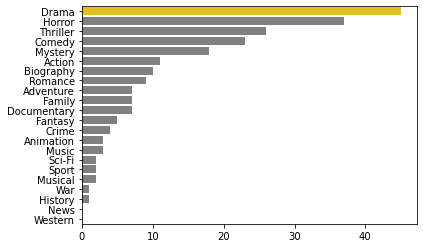

In [131]:
clrs = ['grey' if (x < max(values)) else "gold" for x in values ]
sns.barplot(y = keys, x = values, palette=clrs)